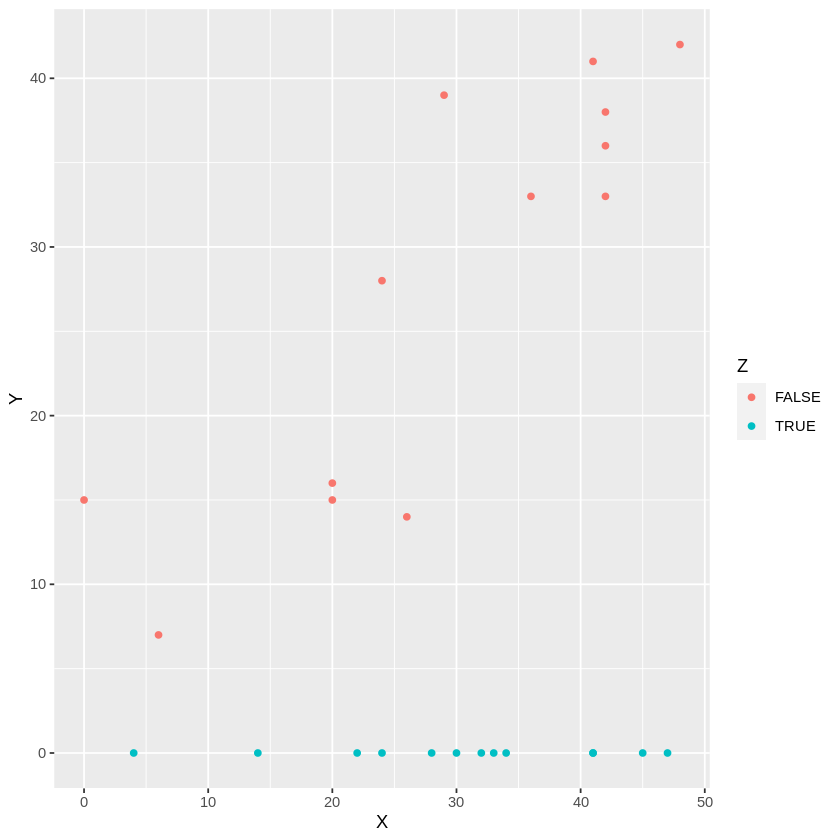

In [ ]:
library("ggplot2")

# the dataset (X,Y), which is assumed to be jointly Gaussian
# NaN indicates that the value is missing
X = c(48,36,20,29,42,42,20,42,22,41,45,14,6,
      0,33,28,34,4,32,24,47,41,24,26,30,41)
Y = c(42,33,16,39,38,36,15,33,NaN,NaN,NaN,NaN,7,
      15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,28,14,NaN,NaN)

# YOUR CODE (~3 lines): construct a data frame "df" with three columns:
# "X": the vector X
# "Y": the vector Y with NaN replaced by zero
# "Z": a boolean vector with Z_i = TRUE if Y_i is missing, and = FALSE otherwise
Z = is.na(Y)
Y[is.na(Y)] = 0
df = data.frame(X, Y, Z)

# YOUR CODE (~1 line): use ggplot, draw a scatterplot of (X, Y)
# use different colors for complete & missing data
ggplot(df, aes(x = X, y = Y, color = Z)) + geom_point()

In [ ]:
# the package "mvtnorm" might be useful to calculate multivariate Gaussian densities
# the documentation could be found at https://cran.r-project.org/web/packages/mvtnorm/mvtnorm.pdf

install.packages("mvtnorm")
library("mvtnorm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
log_likelihood <- function(df, mu, sigma){
  # YOUR CODE (~3 lines): given the parameters (mu, sigma) for the bivariate
  # Gaussian distribution, output the incomplete (unnormalized) log-likelihood
  # of the dataset df
  # Input:
  # - df: a data frame consisting of (X, Y, Z)
  # - mu: a 2 * 1 mean vector of the Gaussian distribution
  # - sigma: a 2 * 2 covariance matrix of the Gaussian distribution
  # Output: a scalar value, which is the overall log-likelihood
  # Note: the dmvnorm() and dnorm() functions might be helpful to compute log
  # densities for the multivariate & univariate Gaussian distributions
  log_l = ifelse(df$Z, dnorm(df$X, mu[1], sqrt(sigma[1,1]), log = TRUE), dmvnorm(cbind(df$X, df$Y), mean = mu, sigma = sigma, log = TRUE))
  overall_l = sum(log_l)

  return(overall_l)
}

In [ ]:
# This is the function for the EM recursion
# Input: the dataset df, and the current parameters (mu, sigma)
# Output: the updated parameters (mu_new, sigma_new)
EM_recursion <- function(df, mu, sigma){
  # YOUR CODE (~2 lines): compute a conditional mean vector cond_mean
  # if Y_i is not missing, then cond_mean_i = Y_i;
  # if Y_i is missing, then cond_mean_i is the conditional mean of Y_i given X_i
  # under the current parameters (mu, sigma) in the Gaussian distribution
  # This quantity is essentially the E-step for the mean

  cond_mean = ifelse(df$Z, mu[2]+(sigma[2,1]/sigma[1,1])*(df$X-mu[1]), df$Y)

  # update of mu; this is the M-step for the mean
  mu_new = c(mean(df$X), mean(cond_mean))

  # YOUR CODE (~2 lines): compute a conditional variance vector cond_var
  # if Y_i is not missing, then cond_var_i = 0;
  # if Y_i is missing, then cond_var_i is the conditional variance of Y_i given
  # X_i under the current parameters (mu, sigma) in the Gaussian distribution
  # This quantity is essentially the E-step for the covariance

  cond_var = ifelse(df$Z, sigma[2,2]-(sigma[1,2]^2/sigma[1,1]), 0)

  # update of sigma: this is the M-step for the covariance
  sigma_new = matrix(c(0,0,0,0), nrow = 2, ncol = 2)
  sigma_new[1,1] = mean((df$X - mu_new[1])^2)
  sigma_new[1,2] = mean((df$X - mu_new[1]) * (cond_mean - mu_new[2]))
  sigma_new[2,1] = sigma_new[1,2]
  sigma_new[2,2] = mean((cond_mean - mu_new[2])^2 + cond_var)

  return(list(mu = mu_new, sigma = sigma_new))
}

In [ ]:
# The overall EM algorithm
# You do not need to change any code in this cell; you only need to run it

# Initialization
mu = c(0,0)
sigma = matrix(c(100,0,0,100), nrow = 2, ncol = 2)
ll = log_likelihood(df,mu,sigma)
tol = 1e-4 # tolerance used in the stopping criterion
print(ll) # print the log likelihood for your reference

while(TRUE){
  # update (mu, sigma)
  theta = EM_recursion(df, mu, sigma)
  ll_new = log_likelihood(df, theta$mu, theta$sigma)
  print(ll_new) # print the new log likelihood for your reference

  if (ll_new - ll < tol) {break} # stopping criterion

  mu = theta$mu
  sigma = theta$sigma
  ll = ll_new
}

# You should see that the EM iteration converges after ~15 iterations
# You should also see that the log-likelihood keeps increasing
# If you don't observe so, go back and check your code

# print the final solution (mu, sigma); include the output in your report
print(mu)
print(sigma)

[1] -320.3494
[1] -158.3237
[1] -153.4698
[1] -150.2142
[1] -147.9178
[1] -146.536
[1] -145.868
[1] -145.6081
[1] -145.5231
[1] -145.4984
[1] -145.4917
[1] -145.4899
[1] -145.4895
[1] -145.4894
[1] -145.4893
[1] 29.65385 27.98097
        [,1]     [,2]
[1,] 171.534 122.9060
[2,] 122.906 124.0466


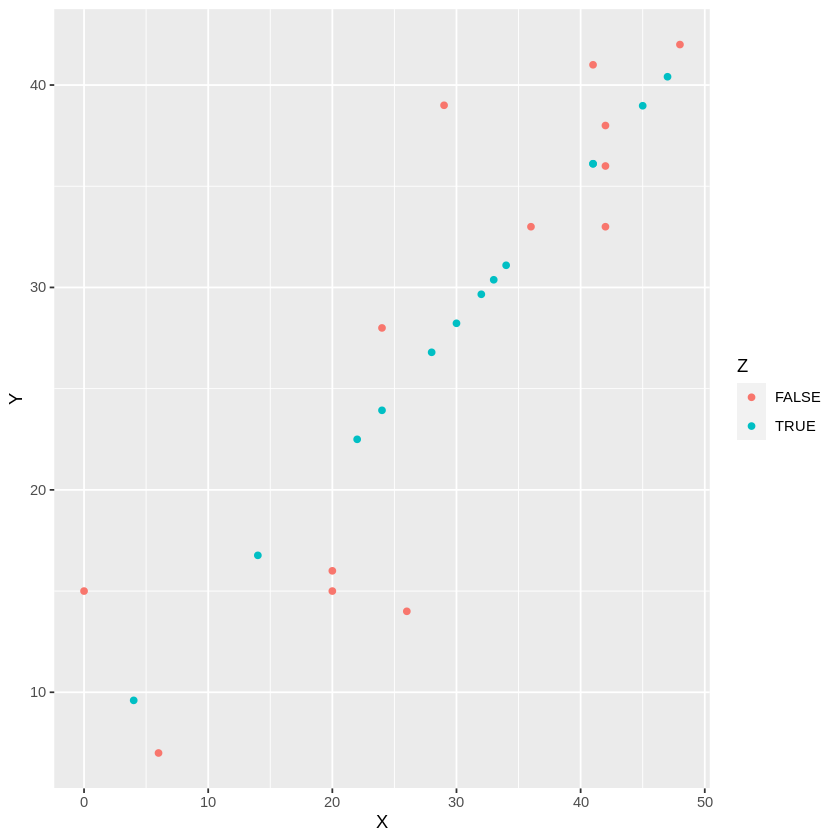

In [ ]:
# YOUR CODE (~3 lines):
# 1. based on the final (mu, sigma), compute the predicted values for the missing
#    values of Y; these should just be the conditional mean of Y given X
# 2. use ggplot, draw a scatterplot of (X, Y) with missing values replaced by
#    the above predictions; use different colors according to Z

final_Y = ifelse(df$Z, mu[2]+(sigma[2,1]/sigma[1,1])*(df$X-mu[1]), df$Y)
final_df = data.frame(X = df$X, Y = final_Y, Z = df$Z)

ggplot(final_df, aes(x = X, y = Y, color = Z)) + geom_point()

### Code Link
https://colab.research.google.com/drive/1mmkWNb6zFRfXcW-IfvGa2ip3AGg7ySdu?usp=sharing